# Minería de Datos - Clasificación Estelar

Realizado por: Iván Tang Zhu

1. Preparación de Datos
2. División de los datos 70-30
3. Aprendizaje del Modelo: Tree, Knn, NN, RandomForest
4. Evaluación del Modelo: matriz de confusion, Precision, Recall, Area ROC
5. Guardar el modelo

* El despliegue se realiza en otro jupyter_notebook

In [ ]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

# 1. Preparación de Datos


In [ ]:
#Cargamos los datos
data = pd.read_excel("datos_preparados.xlsx")
data.head()

,Unnamed: 0,u,g,r,i,z,class,redshift
0,0,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,1,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,2,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,3,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,4,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123


In [ ]:
#Conocemos los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80846 entries, 0 to 80845
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  80846 non-null  int64  
 1   u           80846 non-null  float64
 2   g           80846 non-null  float64
 3   r           80846 non-null  float64
 4   i           80846 non-null  float64
 5   z           80846 non-null  float64
 6   class       80846 non-null  object 
 7   redshift    80846 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.9+ MB


In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#Corrección de variables categóricas
data['class']=data['class'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80846 entries, 0 to 80845
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  80846 non-null  int64   
 1   u           80846 non-null  float64 
 2   g           80846 non-null  float64 
 3   r           80846 non-null  float64 
 4   i           80846 non-null  float64 
 5   z           80846 non-null  float64 
 6   class       80846 non-null  category
 7   redshift    80846 non-null  float64 
dtypes: category(1), float64(6), int64(1)
memory usage: 4.4 MB


In [ ]:
#Descripción de variables numéricas
data.describe()

,u,g,r,i,z,redshift
count,80846.000000,80846.000000,80846.000000,80846.000000,80846.000000,80846.000000
mean,22.161349,20.704360,19.703051,19.128452,18.806497,0.584377
std,2.265937,2.047053,1.855143,1.751144,1.757559,0.739235
min,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971
25%,20.425982,19.080290,18.250495,17.835680,17.561720,0.056781
50%,22.303210,21.195375,20.194430,19.449885,19.041040,0.442380
75%,23.789323,22.180855,21.086710,20.426460,19.928162,0.705790
max,32.781390,30.607000,29.571860,30.250090,29.383740,7.011245


<Axes: >

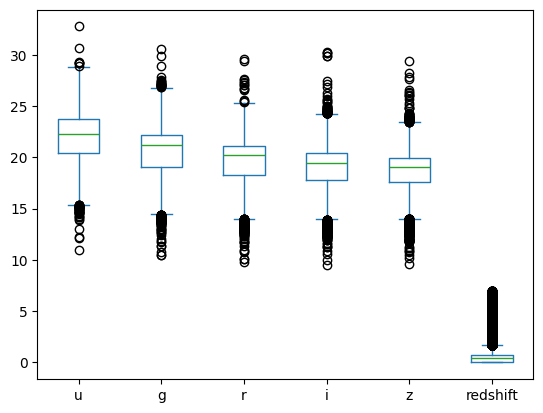

In [ ]:
#Descripción variables numéricas
data.plot(kind='box')

<Axes: xlabel='class'>

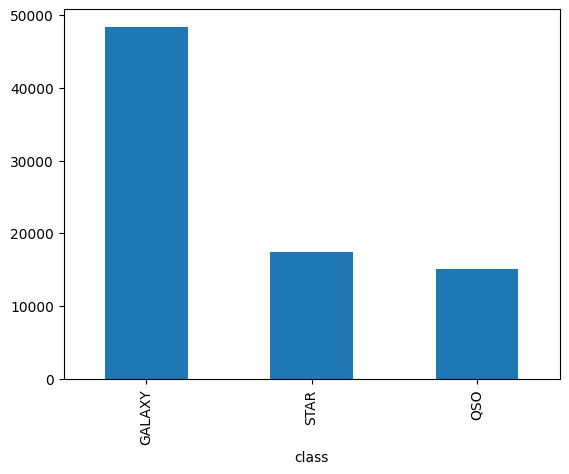

In [ ]:
#Descripción variables categóricas
data['class'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

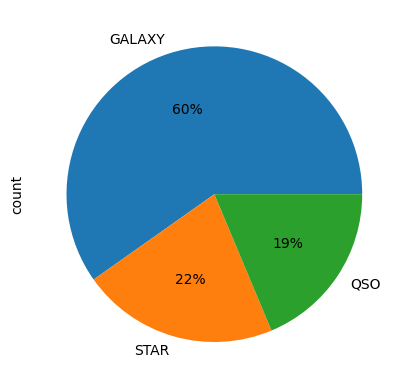

In [ ]:
data['class'].value_counts().plot(kind='pie', autopct='%.0f%%')

In [ ]:
#Se crean dummies a las variables predictoras categóricas (no a la variable obj)
# No hay necesidad de hacer dummies

##Codificar variable objetivo

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Se codifican las categorias de la VARIABLE OBJETIVO

labelencoder = LabelEncoder()
data["class"]=labelencoder.fit_transform(data["class"]) #Objetivo

data.head()

,u,g,r,i,z,class,redshift
0,23.87882,22.27530,20.39501,19.16573,18.79371,0,0.634794
1,24.77759,22.83188,22.58444,21.16812,21.61427,0,0.779136
2,25.26307,22.66389,20.60976,19.34857,18.94827,0,0.644195
3,22.13682,23.77656,21.61162,20.50454,19.25010,0,0.932346
4,19.43718,17.58028,16.49747,15.97711,15.54461,0,0.116123


# 2. División 70-30


In [ ]:
from sklearn.model_selection import train_test_split

<Axes: xlabel='class'>

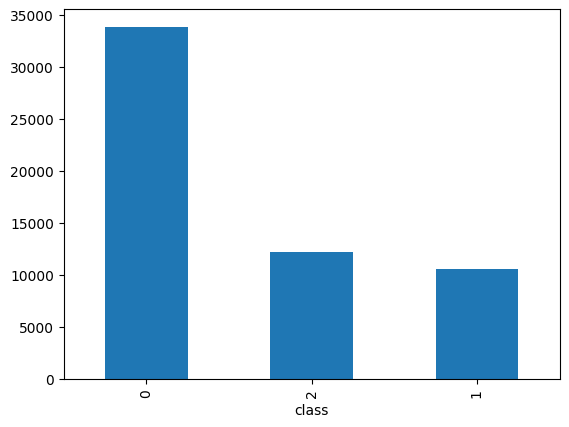

In [ ]:
#División 70-30
X = data.drop("class", axis = 1) # Variables predictoras
Y = data['class'] #Variable objetivo
# Se pone estratificado en Clasificación. En regresión no
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')

#3. Balanceo del 70% de los datos

In [ ]:
#Creamos un dataframe con los resultados
data_70_balanceada  = pd.DataFrame(columns=X.columns.values, data=X_train)
data_70_balanceada['class']=Y_train
data_70_balanceada['class'].value_counts().plot(kind='bar')

In [ ]:
from imblearn.over_sampling import SMOTE, SMOTENC

#sm = SMOTE( k_neighbors=2) para variables predictoras numéricas
#sm = SMOTENC(categorical_features=[], k_neighbors=2) para variables predictoras categóricas

# Clase mayoritaria y tamaño
conteos = data['class'].value_counts()
clase_mayor = conteos.idxmax()
tam_mayor = conteos.max()

balanceo_1 = int(tam_mayor * 0.5)

# Para multiclase hay que indicar cuanto se balancea
sampling_strategy = {
    1: balanceo_1
}

sm = SMOTENC(categorical_features=[0], k_neighbors=2, sampling_strategy=sampling_strategy) #se indican las variables predictoras categoricas
X= data.drop('Class', axis=1) #Predictoras
Y= data['Class'] #Objetivo
X_bal, Y_bal = sm.fit_resample(X,Y) #X= variables predictoras Y=variable objetivo

#Validación Cruzada

In [ ]:
#Validación Cruzada
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

#Dataframe para comparar los modelos
comparacion_CV=pd.DataFrame()

#Medidas de evaluación
scoring=('f1_macro', 'accuracy','precision_macro', 'recall_macro')

#Muestreo lineal
cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#3. Aprendizaje con el 70% y Evaluación con el 30%


##Modelos simples

### **Tree**
Transformacion: Discretizar, el algoritmo es capaz de hacerlo por si mismo. **No se normaliza**

In [ ]:
#Método de ML a usar en la validación cruzada
from sklearn import tree
modelTree = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, max_depth=None)

scores = cross_validate(modelTree, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,1.462241,0.017499,0.960831,0.990767,0.966784,0.992146,0.965606,0.994687,0.956342,0.987027
1,1.541226,0.017752,0.957954,0.990919,0.964134,0.992264,0.960548,0.994853,0.955431,0.987165
2,1.077971,0.011439,0.961277,0.990767,0.966955,0.992147,0.963647,0.994652,0.959019,0.987063
3,1.027365,0.011261,0.962990,0.990590,0.968722,0.992009,0.969430,0.994723,0.957093,0.986664
4,0.979241,0.012351,0.957016,0.990725,0.963421,0.992107,0.960490,0.994625,0.953704,0.987008
5,1.007912,0.011542,0.964252,0.990748,0.969606,0.992127,0.967079,0.994485,0.961539,0.987177
6,1.019328,0.011226,0.960026,0.991168,0.965895,0.992480,0.962561,0.994795,0.957602,0.987697
7,1.015915,0.011900,0.966918,0.989942,0.971726,0.991459,0.970286,0.994186,0.963663,0.985914
8,1.007298,0.011292,0.963920,0.990107,0.969429,0.991577,0.967705,0.994341,0.960384,0.986084
9,1.013457,0.011450,0.962377,0.989944,0.967839,0.991440,0.963106,0.994144,0.961653,0.985949


In [ ]:
# Promedios para verificar overfitting comparando medidas en train y test
scores.mean()

,0
fit_time,1.115196
score_time,0.012771
test_f1_macro,0.961756
train_f1_macro,0.990568
test_accuracy,0.967451
train_accuracy,0.991976
test_precision_macro,0.965046
train_precision_macro,0.994549
test_recall_macro,0.958643
train_recall_macro,0.986775


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['Tree']=scores['test_f1_macro']
comparacion_CV

,Tree
0,0.960831
1,0.957954
2,0.961277
3,0.962990
4,0.957016
5,0.964252
6,0.960026
7,0.966918
8,0.963920
9,0.962377


In [ ]:
from sklearn.tree import plot_tree

In [ ]:
modelTree.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_leaf=2)

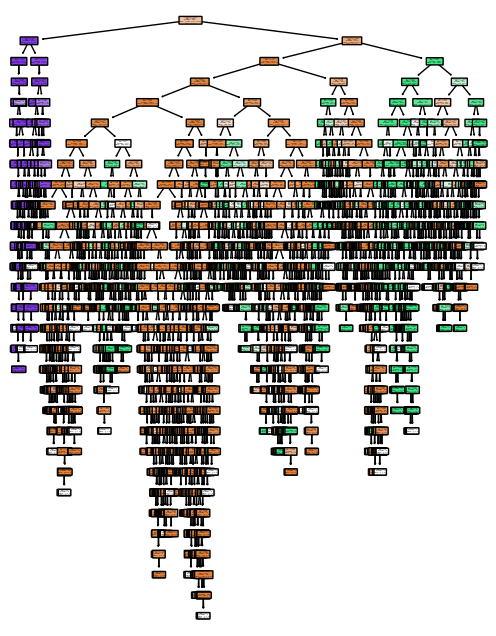

In [ ]:
plt.figure(figsize=(6,8)) #Tamaño de la imagen
plot_tree(modelTree, feature_names=X_train.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True)
plt.show()

- Hacia la izquierda es verdadero y hacia la derecha falso

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf= RandomForestClassifier(n_estimators=100,  max_samples=0.9,
                                criterion='gini', max_depth=None, min_samples_leaf=10)

scores = cross_validate(model_rf, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,19.690472,0.094282,0.969708,0.977739,0.974382,0.981151,0.973941,0.981992,0.965794,0.973799
1,20.446585,0.096882,0.969321,0.978411,0.974028,0.981701,0.972826,0.982375,0.966030,0.974727
2,19.615290,0.094710,0.971426,0.977758,0.975791,0.981191,0.976083,0.982023,0.967205,0.973795
3,20.197122,0.094268,0.975605,0.977371,0.979325,0.980857,0.980619,0.981728,0.970993,0.973339
4,20.415412,0.121127,0.974001,0.978139,0.977911,0.981505,0.977745,0.982394,0.970556,0.974187
5,19.638624,0.094262,0.972121,0.977505,0.976498,0.980975,0.977469,0.981957,0.967207,0.973386
6,20.570254,0.104385,0.972792,0.977895,0.976851,0.981309,0.975840,0.982386,0.969965,0.973740
7,19.483679,0.095556,0.977063,0.977748,0.980562,0.981152,0.981425,0.981784,0.972984,0.973994
8,20.615859,0.096671,0.973057,0.977592,0.977381,0.981034,0.980029,0.981821,0.966859,0.973662
9,20.322086,0.100495,0.974707,0.977405,0.978441,0.980838,0.976017,0.981572,0.973473,0.973552


In [ ]:
scores.mean()

,0
fit_time,20.099538
score_time,0.099264
test_f1_macro,0.972980
train_f1_macro,0.977756
test_accuracy,0.977117
train_accuracy,0.981171
test_precision_macro,0.977199
train_precision_macro,0.982003
test_recall_macro,0.969107
train_recall_macro,0.973818


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['RandomForest']=scores['test_f1_macro']
comparacion_CV

,Tree,RandomForest
0,0.960831,0.969708
1,0.957954,0.969321
2,0.961277,0.971426
3,0.962990,0.975605
4,0.957016,0.974001
5,0.964252,0.972121
6,0.960026,0.972792
7,0.966918,0.977063
8,0.963920,0.973057
9,0.962377,0.974707


### **KNN**
* Primero hay que hacer *Normalización*

####Normalización

In [ ]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

In [ ]:
var_numericas = ['u', 'g', 'r', 'i', 'z', 'redshift']

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data[var_numericas]) #Ajuste de los parametros sobre 100% de los datos (data): max - min

#Se aplica la normalización a 70%  y 30%
X_train[var_numericas]= min_max_scaler.transform(X_train[var_numericas]) #70%
X_test[var_numericas]= min_max_scaler.transform(X_test[var_numericas]) #30%
X_train.head()

,u,g,r,i,z,redshift
28469,0.653843,0.615668,0.580692,0.499208,0.472532,0.001379
78324,0.360237,0.308465,0.287091,0.266720,0.257183,0.021791
10962,0.659640,0.547889,0.497864,0.462867,0.429569,0.001407
25149,0.500773,0.583157,0.559476,0.493335,0.504792,0.081821
28554,0.410690,0.374072,0.371224,0.350493,0.346596,0.013969


####Modelo Knn

In [ ]:
from sklearn.neighbors  import KNeighborsClassifier

In [ ]:
#Validación Cruzada
#Método Perezoso
model_knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')

scores = cross_validate(model_knn, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.065967,0.093559,0.939181,0.974193,0.946820,0.977774,0.951774,0.987693,0.928092,0.962139
1,0.064318,0.113001,0.937304,0.974455,0.945406,0.977990,0.949026,0.987861,0.926913,0.962483
2,0.067068,0.095129,0.945408,0.973511,0.952112,0.977205,0.956812,0.987369,0.935271,0.961172
3,0.065390,0.097447,0.944058,0.974087,0.951228,0.977696,0.958228,0.987680,0.931643,0.961970
4,0.133517,0.159971,0.945474,0.973432,0.952112,0.977146,0.958982,0.987311,0.933570,0.961077
5,0.115534,0.175382,0.941515,0.973791,0.948754,0.977461,0.952709,0.987474,0.931431,0.961595
6,0.064962,0.108116,0.942795,0.974008,0.949991,0.977578,0.952084,0.987674,0.934440,0.961819
7,0.064520,0.091198,0.943873,0.973900,0.950521,0.977598,0.953873,0.987545,0.934944,0.961753
8,0.062804,0.089876,0.941828,0.973592,0.949284,0.977284,0.956764,0.987466,0.928893,0.961254
9,0.066990,0.095527,0.949880,0.974093,0.956353,0.977657,0.960734,0.987770,0.940231,0.961907


In [ ]:
scores.mean()

,0
fit_time,0.077107
score_time,0.111921
test_f1_macro,0.943132
train_f1_macro,0.973906
test_accuracy,0.950258
train_accuracy,0.977539
test_precision_macro,0.955099
train_precision_macro,0.987584
test_recall_macro,0.932543
train_recall_macro,0.961717


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['Knn']=scores['test_f1_macro']
comparacion_CV

,Tree,RandomForest,Knn
0,0.960831,0.969708,0.939181
1,0.957954,0.969321,0.937304
2,0.961277,0.971426,0.945408
3,0.962990,0.975605,0.944058
4,0.957016,0.974001,0.945474
5,0.964252,0.972121,0.941515
6,0.960026,0.972792,0.942795
7,0.966918,0.977063,0.943873
8,0.963920,0.973057,0.941828
9,0.962377,0.974707,0.949880


### **Red Neuronal**
- Primero hay que *Normalizar*

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#Red Neuronal

#Solo se configura capas ocultas, no se configura capa de entrada y de salida
#activation -> función activación de la oculta: sigmoid, logistic, linear
#hidden_layer_sizes=5,7 -> dos capas ocultas con 5 neuronas y 7 neuronas
#learning_rate-> tamaño del paso constante o decreciente (constant, adaptive)
#learning_rate_init-> valor tasa de aprendizaje
#momentum-> valor momentum
#max_iter-> iteraciones
#random_state-> semilla para generacion numeros pseudoaletorios
#Validación Cruzada: division, aprendizaje, evaluacion
#Red neuronal
model_rn = MLPClassifier(activation="relu",hidden_layer_sizes=(20,), learning_rate='adaptive',
                     learning_rate_init=0.02, momentum= 0.2, max_iter=500, verbose=False)

scores = cross_validate(model_rn, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,12.560137,0.023238,0.959891,0.962941,0.965548,0.968134,0.962519,0.965554,0.957837,0.960898
1,7.668358,0.020735,0.957947,0.962319,0.964134,0.967820,0.963275,0.967796,0.953625,0.957880
2,3.861801,0.016616,0.960078,0.962133,0.965542,0.967271,0.960750,0.961714,0.959757,0.962763
3,4.818070,0.016794,0.962402,0.957496,0.966955,0.962539,0.955791,0.949891,0.969478,0.965730
4,7.186621,0.023308,0.962613,0.958920,0.968369,0.965111,0.969900,0.965933,0.956604,0.953311
5,13.171624,0.019598,0.960711,0.963751,0.966779,0.969116,0.969433,0.970568,0.953724,0.958211
6,9.327164,0.022227,0.957553,0.961708,0.963598,0.967349,0.960885,0.967143,0.954987,0.957284
7,11.451596,0.046245,0.962037,0.958200,0.967839,0.964679,0.970775,0.967854,0.955182,0.950716
8,4.620732,0.016397,0.960835,0.959676,0.965718,0.964522,0.956871,0.953580,0.965078,0.966158
9,15.421148,0.023244,0.967777,0.963647,0.972257,0.968940,0.971114,0.968808,0.965086,0.959404


In [ ]:
scores.mean()

,0
fit_time,9.008725
score_time,0.022840
test_f1_macro,0.961185
train_f1_macro,0.961079
test_accuracy,0.966674
train_accuracy,0.966548
test_precision_macro,0.964131
train_precision_macro,0.963884
test_recall_macro,0.959136
train_recall_macro,0.959235


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['RedNeuronal']=scores['test_f1_macro']
comparacion_CV

,Tree,RandomForest,Knn,RedNeuronal
0,0.960831,0.969708,0.939181,0.959891
1,0.957954,0.969321,0.937304,0.957947
2,0.961277,0.971426,0.945408,0.960078
3,0.962990,0.975605,0.944058,0.962402
4,0.957016,0.974001,0.945474,0.962613
5,0.964252,0.972121,0.941515,0.960711
6,0.960026,0.972792,0.942795,0.957553
7,0.966918,0.977063,0.943873,0.962037
8,0.963920,0.973057,0.941828,0.960835
9,0.962377,0.974707,0.949880,0.967777


In [ ]:
model_rn.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(20,), learning_rate='adaptive',
              learning_rate_init=0.02, max_iter=500, momentum=0.2)

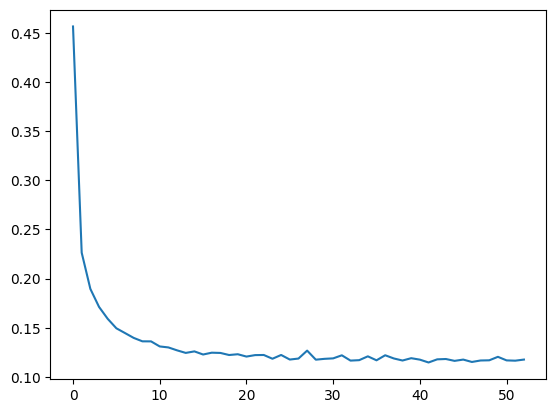

In [ ]:
#Loss es la desviación entre Y_train y el Y_pred
loss_values = model_rn.loss_curve_
plt.plot(loss_values)

- Si la gráfica de perdida empieza a subir, significa que hay sobrentrenamiento (Overfitting)

##Modelos de ensamble

###XGBoost

In [ ]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(
    max_depth=10,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9  #enable_categorical=True,
)
scores = cross_validate(model_xgb, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,2.690963,0.075616,0.964540,0.992828,0.969435,0.993894,0.967967,0.994951,0.961367,0.990772
1,2.708781,0.077070,0.965720,0.992806,0.970495,0.993874,0.969554,0.995093,0.962082,0.990598
2,4.513333,0.075066,0.975042,0.992386,0.978795,0.993521,0.978399,0.994683,0.971916,0.990165
3,2.706604,0.075356,0.973452,0.992124,0.977204,0.993305,0.977845,0.994591,0.969319,0.989747
4,2.738033,0.082826,0.970507,0.992239,0.974554,0.993403,0.973913,0.994577,0.967274,0.989979
5,5.028453,0.074354,0.971907,0.992145,0.976144,0.993325,0.974102,0.994538,0.969829,0.989834
6,2.701459,0.077136,0.969583,0.992428,0.973670,0.993560,0.972135,0.994779,0.967174,0.990158
7,2.693882,0.075097,0.970912,0.992043,0.975084,0.993226,0.975066,0.994307,0.966961,0.989857
8,4.769018,0.126581,0.969685,0.992495,0.974024,0.993599,0.974954,0.994787,0.964834,0.990280
9,2.726392,0.075174,0.973585,0.992411,0.977204,0.993541,0.974472,0.994783,0.972721,0.990122


In [ ]:
scores.mean()

,0
fit_time,3.327692
score_time,0.081428
test_f1_macro,0.970493
train_f1_macro,0.992390
test_accuracy,0.974661
train_accuracy,0.993525
test_precision_macro,0.973841
train_precision_macro,0.994709
test_recall_macro,0.967348
train_recall_macro,0.990151


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['XGBoost']=scores['test_f1_macro']
comparacion_CV

,Tree,RandomForest,Knn,RedNeuronal,Stacking,VotingHard,XGBoost
0,0.960831,0.969708,0.939181,0.959891,0.970055,0.964834,0.964540
1,0.957954,0.969321,0.937304,0.957947,0.969661,0.965893,0.965720
2,0.961277,0.971426,0.945408,0.960078,0.973330,0.967723,0.975042
3,0.962990,0.975605,0.944058,0.962402,0.976037,0.969313,0.973452
4,0.957016,0.974001,0.945474,0.962613,0.974341,0.971615,0.970507
5,0.964252,0.972121,0.941515,0.960711,0.972416,0.966402,0.971907
6,0.960026,0.972792,0.942795,0.957553,0.973413,0.965591,0.969583
7,0.966918,0.977063,0.943873,0.962037,0.976037,0.969961,0.970912
8,0.963920,0.973057,0.941828,0.960835,0.972889,0.968868,0.969685
9,0.962377,0.974707,0.949880,0.967777,0.976041,0.968270,0.973585


###Voting hard

In [ ]:
#Votación hard: todos los modelos tiene el mismo peso
from sklearn.ensemble import VotingClassifier

clasificadores= [('knn', model_knn), ('net', model_rn), ('rf', model_rf)]

model_vot_hard = VotingClassifier(estimators=clasificadores, voting='hard')
scores = cross_validate(model_vot_hard, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,25.259015,0.235822,0.964834,0.976744,0.969965,0.980425,0.969453,0.982750,0.960949,0.971295
1,48.458361,0.242655,0.965893,0.977669,0.970848,0.981151,0.969282,0.982842,0.962958,0.972928
2,29.721088,0.243452,0.967723,0.976449,0.972433,0.980170,0.973447,0.982559,0.962948,0.970919
3,32.027345,0.259943,0.969313,0.976330,0.973670,0.980033,0.973703,0.982000,0.965497,0.971169
4,30.344729,0.238986,0.971615,0.976966,0.975791,0.980563,0.976306,0.982434,0.967464,0.971970
5,29.349189,0.245842,0.966402,0.976803,0.971373,0.980445,0.970664,0.982362,0.962791,0.971737
6,25.471186,0.246312,0.965591,0.976461,0.970313,0.980190,0.968546,0.982891,0.963284,0.970680
7,25.590732,0.245443,0.969961,0.976333,0.974200,0.980072,0.974034,0.982207,0.966535,0.970999
8,28.119678,0.244528,0.968868,0.977744,0.973494,0.981191,0.974552,0.982505,0.964042,0.973355
9,28.428983,0.360380,0.968270,0.977108,0.972787,0.980681,0.969792,0.982566,0.967073,0.972131


In [ ]:
scores.mean()

,0
fit_time,30.277031
score_time,0.256336
test_f1_macro,0.967847
train_f1_macro,0.976861
test_accuracy,0.972487
train_accuracy,0.980492
test_precision_macro,0.971978
train_precision_macro,0.982512
test_recall_macro,0.964354
train_recall_macro,0.971718


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['VotingHard']=scores['test_f1_macro']
comparacion_CV

,Tree,RandomForest,Knn,RedNeuronal,Stacking,VotingHard
0,0.960831,0.969708,0.939181,0.959891,0.970055,0.964834
1,0.957954,0.969321,0.937304,0.957947,0.969661,0.965893
2,0.961277,0.971426,0.945408,0.960078,0.973330,0.967723
3,0.962990,0.975605,0.944058,0.962402,0.976037,0.969313
4,0.957016,0.974001,0.945474,0.962613,0.974341,0.971615
5,0.964252,0.972121,0.941515,0.960711,0.972416,0.966402
6,0.960026,0.972792,0.942795,0.957553,0.973413,0.965591
7,0.966918,0.977063,0.943873,0.962037,0.976037,0.969961
8,0.963920,0.973057,0.941828,0.960835,0.972889,0.968868
9,0.962377,0.974707,0.949880,0.967777,0.976041,0.968270


###Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

clasificadores= [('tree', modelTree), ('knn', model_knn), ('net', model_rf)]

metodo_ensamblador= LogisticRegression()

model_stack= StackingClassifier(estimators=clasificadores, final_estimator=metodo_ensamblador)

scores = cross_validate(model_stack, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,103.579414,0.262163,0.970055,0.981144,0.974558,0.984038,0.973646,0.984886,0.966666,0.977624
1,104.390605,0.259205,0.969661,0.981272,0.974382,0.984136,0.973539,0.985007,0.966010,0.977756
2,105.078971,0.246131,0.973330,0.981125,0.977381,0.984018,0.977376,0.984784,0.969610,0.977683
3,103.711830,0.261467,0.976037,0.981290,0.979678,0.984175,0.980299,0.985163,0.972058,0.977650
4,104.971753,0.343350,0.974341,0.981238,0.978265,0.984116,0.978631,0.985141,0.970361,0.977574
5,104.035309,0.254450,0.972416,0.980010,0.976674,0.983095,0.976479,0.983966,0.968607,0.976301
6,103.747274,0.253061,0.973413,0.981534,0.977381,0.984372,0.976330,0.985414,0.970694,0.977884
7,104.306468,0.258123,0.976037,0.980664,0.979678,0.983626,0.979967,0.984372,0.972316,0.977180
8,105.181312,0.249174,0.972889,0.980518,0.977204,0.983508,0.979423,0.984339,0.967019,0.976924
9,103.910604,0.267731,0.976041,0.980722,0.979678,0.983684,0.977941,0.984679,0.974204,0.977013


In [ ]:
scores.mean()

,0
fit_time,104.291354
score_time,0.265486
test_f1_macro,0.973422
train_f1_macro,0.980952
test_accuracy,0.977488
train_accuracy,0.983877
test_precision_macro,0.977363
train_precision_macro,0.984775
test_recall_macro,0.969754
train_recall_macro,0.977359


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['Stacking']=scores['test_f1_macro']
comparacion_CV

,Tree,RandomForest,Knn,RedNeuronal,Stacking
0,0.960831,0.969708,0.939181,0.959891,0.970055
1,0.957954,0.969321,0.937304,0.957947,0.969661
2,0.961277,0.971426,0.945408,0.960078,0.973330
3,0.962990,0.975605,0.944058,0.962402,0.976037
4,0.957016,0.974001,0.945474,0.962613,0.974341
5,0.964252,0.972121,0.941515,0.960711,0.972416
6,0.960026,0.972792,0.942795,0.957553,0.973413
7,0.966918,0.977063,0.943873,0.962037,0.976037
8,0.963920,0.973057,0.941828,0.960835,0.972889
9,0.962377,0.974707,0.949880,0.967777,0.976041


#Evaluación con 30%

In [ ]:
from sklearn import metrics

              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     14502
         QSO       0.95      0.91      0.93      4532
        STAR       0.97      1.00      0.99      5220

    accuracy                           0.97     24254
   macro avg       0.96      0.96      0.96     24254
weighted avg       0.97      0.97      0.97     24254



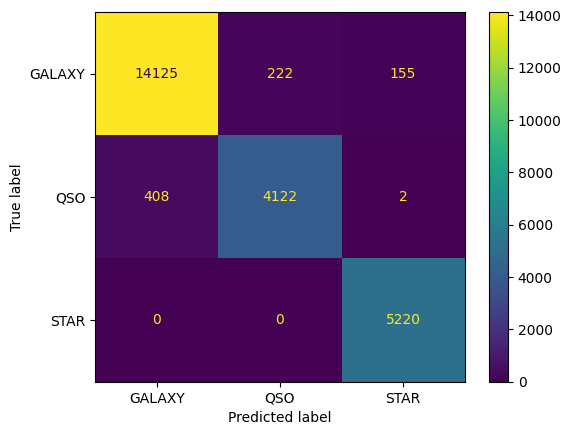

In [ ]:
#Evaluación de Red Neuronal

Y_pred = model_rn.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
#metrics.RocCurveDisplay.from_estimator(model_rn,X_test, Y_test)

# 5. Guardamos el modelo

In [ ]:
import pickle
filename = 'modelo.pkl'
variables= X.columns._values
pickle.dump([modelTree, model_rf,modelKnn, modelNN, modelSVM, labelencoder, variables, min_max_scaler], open(filename, 'wb'))